In [12]:
import random
from math import exp, log
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


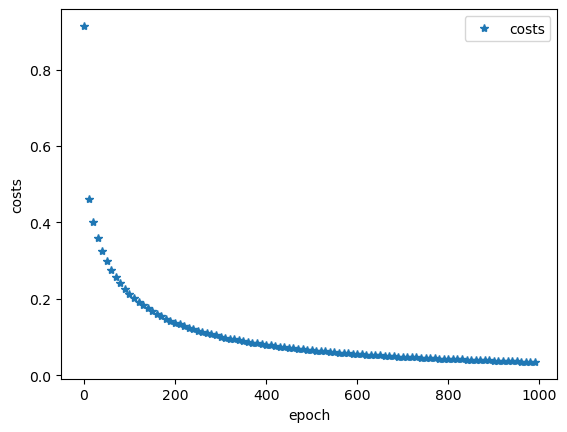

9.796482026146379e-05
0.03935276310791522
0.039352873307475056
0.9448372572863989


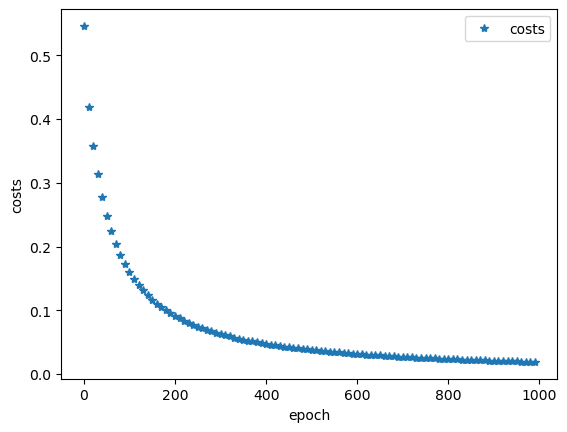

0.04139273629434016
0.9835023510780628
0.983496275440016
0.9999878455854485


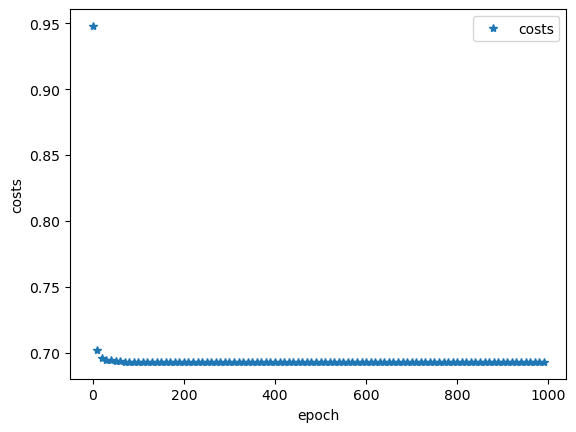

0.499999999810118
0.49999999997020095
0.4999999999702027
0.5000000001302858


In [18]:
class logisitic_regression_model():
    def __init__(self, X, Y):
        self.w = [random.random(), random.random()]
        self.b = random.random()
        self.X = X
        self.Y = Y

    def sigmoid(self, z):
        return 1 / (1 + exp(-z))

    def predict(self, x):
        z = self.w[0] * x[0] + self.w[1] * x[1] + self.b
        a = self.sigmoid(z)
        return a

    def train(self, lr=0.1):
        dw0 = 0.0
        dw1 = 0.0
        db = 0.0
        m = len(self.X)
        cost = 0.0
        for x, y in zip(self.X, self.Y):
            a = self.predict(x)
            if y == 1:
                cost -= log(a)
            else:
                cost -= log(1 - a)
            dw0 += (a - y) * x[0]
            dw1 += (a - y) * x[1]
            db += (a - y)
        cost /= m
        self.w[0] -= lr * dw0 / m
        self.w[1] -= lr * dw1 / m
        self.b -= lr * db / m
        return cost


X = [(0, 0), (1, 0), (0, 1), (1, 1)]
Ys = [
    [0, 0, 0, 1], # AND
    [0, 1, 1, 1], # OR
    [0, 1, 1, 0], # XOR
]

for Y in Ys:
    model = logisitic_regression_model(X, Y)
    epochs = []
    costs = []
    plt.figure()

    for epoch in range(1000):
        cost = model.train(0.5)
        if epoch % 10 == 0:
            epochs.append(epoch)
            costs.append(cost)
    plt.plot(epochs, costs, '*', label='costs')
    plt.xlabel('epoch')
    plt.ylabel('costs')
    plt.legend()
    plt.show()

    for x in X:
        print(model.predict(x))
    